# Søndagsmoro :-)
TIl forelesning 3. februar - tilknyttet kurset SOK3023 *Maskinlæring for økonomer*.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


## Datasett
Etter litt leiting på internett, fant jeg et datasett kalt [CIFAR-10](https://www.tensorflow.org/datasets/catalog/cifar10), hvor vi kan bruke Keras/Tensorflow for å lage CNN.

Datasettet inneholder 60000 32×32 farge-bilder fra 10 ulike klasser, med 6000 bilder per klasse (5000 = trening, 1000 = test).

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
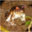

In [3]:
X_train[0]

## La oss titte på dataene

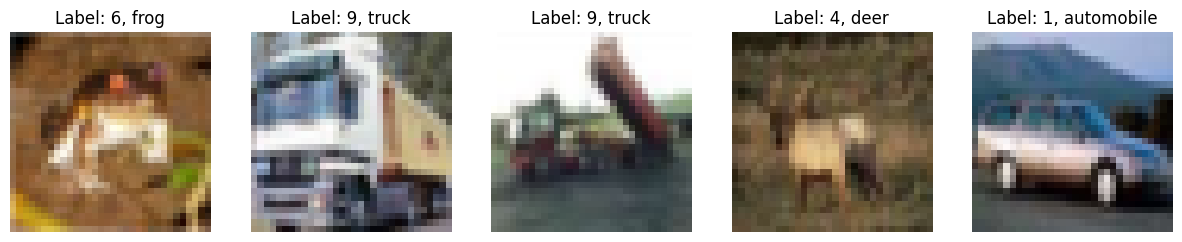

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)

Data types:
X_train: uint8
y_train: uint8
X_test: uint8
y_test: uint8

Piksel verdier for (X_train): 0 - 255

Unique labels: [0 1 2 3 4 5 6 7 8 9]

Label counts: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Antall eksempelbilder
num_samples = 5

# Lager figur og plot
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Itererer gjennom data og viser bilde og labels
for i in range(num_samples):
  axes[i].imshow(X_train[i])
  axes[i].set_title(f"Label: {y_train[i][0]}, {labels[y_train[i][0]]}")  # Finn verdi til label, og print hva det er
  axes[i].axis('off')

plt.show()

# Printer shapes og data typer
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("\nData types:")
print("X_train:", X_train.dtype)
print("y_train:", y_train.dtype)
print("X_test:", X_test.dtype)
print("y_test:", y_test.dtype)

# Viser litt basic statistikk
print("\nPiksel verdier for (X_train):", np.min(X_train), "-", np.max(X_train))

# Se på hvilke labels vi har, og hvor mange.
unique_labels = np.unique(y_train)
print("\nUnique labels:", unique_labels)

label_counts = np.bincount(y_train.flatten())
print("\nLabel counts:", label_counts)

## Normalisere data
Vi husker at bildedata, kommer som en rank-3 tensor, altså RGB (Rød, grønn, blå kanaler). Disse verdiene til pikselene er mellom $0$ og $255$. Derfor normaliserer vi disse til å bli mellom $0$ og $1$ ved å dele på $255.0$.

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

## Moroa
La oss lage vårt CNN :D

In [7]:
CNN_model = tf.keras.Sequential(
    [tf.keras.layers.Conv2D(32, (3,3), 1,
                           activation="relu",
                           input_shape=(32, 32, 3)),

    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3,3), 1, activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(85, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 85)                  │         195,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             860 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,177 (844.44 KB)

 Trainable params: 216,177 (844.44 KB)

 Non-trainable params: 0 (0.00 B)

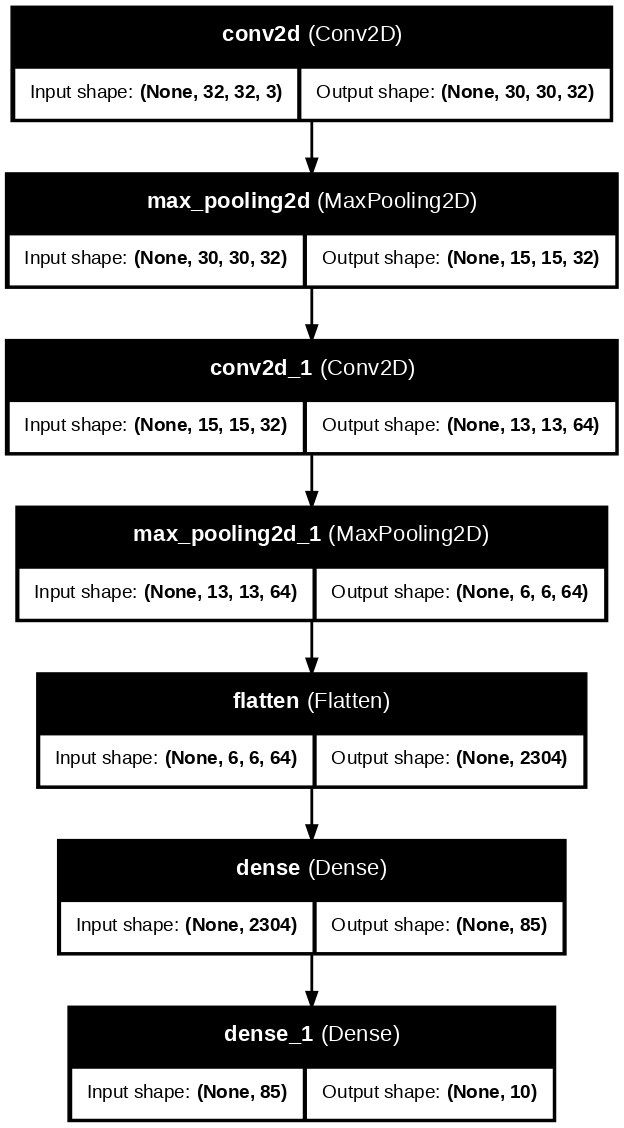

In [9]:
tf.keras.utils.plot_model(
    CNN_model,
    to_file="vår_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=100,
)

In [10]:
CNN_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(patience=2)]

In [39]:
history = CNN_model.fit(X_train,y_train, epochs=30, callbacks=callbacks)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.3968 - loss: 1.6525
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.6181 - loss: 1.0955
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 42ms/step - accuracy: 0.6702 - loss: 0.9365
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7049 - loss: 0.8419
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7404 - loss: 0.7471
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7637 - loss: 0.6819
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7830 - loss: 0.6183
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.8062 - loss: 0.5554
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.8225 - loss: 0.5067
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.8381 - loss: 0.4602
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.8496 - loss: 0.4237
Epoch 12/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.8703 - loss: 0.3755
Epoch 13/30
1563/1

## Hvordan gikk dette da?

In [40]:
test_loss, test_acc = CNN_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6771 - loss: 2.4413
Test Accuracy: 0.6800
Test Loss: 2.4148


In [42]:
y_pred = CNN_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Konverter ss til klasser (class indices)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.81      0.80      0.80      1000
           2       0.59      0.53      0.55      1000
           3       0.47      0.52      0.50      1000
           4       0.69      0.57      0.63      1000
           5       0.54      0.59      0.57      1000
           6       0.72      0.76      0.74      1000
           7       0.73      0.73      0.73      1000
           8       0.79      0.77      0.78      1000
           9       0.75      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



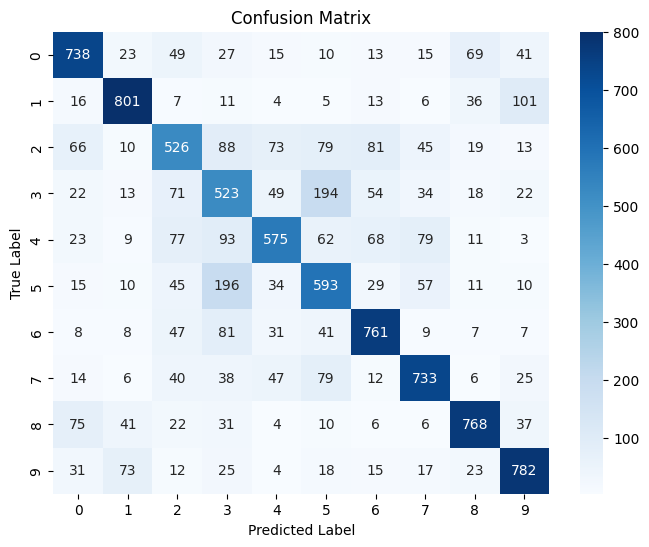

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generer classification_report
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plotring av Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()